In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
match_data=pd.read_csv("E:\Data set/IPL_Matches_2008_2021.csv")
ball_data=pd.read_csv("E:\Data set/IPL_Ball_by_Ball_2008_2021.csv")

In [10]:
match_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma


In [11]:
ball_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1254117,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,1254117,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
2,1254117,1,0,3,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
3,1254117,1,0,4,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,4,0,4,0,0,NaN,NaN,NaN,Chennai Super Kings
4,1254117,1,0,5,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings


In [12]:
match_data.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             857
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [13]:
ball_data.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           197043
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           197803
kind                 197803
fielders_involved    200758
BattingTeam               0
dtype: int64

In [14]:
match_data.shape

(876, 20)

In [15]:
ball_data.shape

(208042, 17)

In [16]:
ball_data.index

RangeIndex(start=0, stop=208042, step=1)

In [17]:
match_data

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
872,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
873,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
874,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [18]:
match_data.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [19]:
ball_data.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [20]:
print(' Matches played so far:',match_data.shape[0])
print('\n cities played at:',match_data['City'].unique())
print('\n Teams participated:',match_data['Team1'].unique())

 Matches played so far: 876

 cities played at: ['Dubai' 'Sharjah' 'Abu Dhabi' 'Ahmedabad' 'Delhi' 'Chennai' 'Mumbai' nan
 'Hyderabad' 'Visakhapatnam' 'Chandigarh' 'Bengaluru' 'Kolkata' 'Jaipur'
 'Pune' 'Indore' 'Bangalore' 'Kanpur' 'Rajkot' 'Raipur' 'Ranchi' 'Cuttack'
 'Dharamsala' 'Kochi' 'Nagpur' 'Johannesburg' 'Centurion' 'Durban'
 'Bloemfontein' 'Port Elizabeth' 'Kimberley' 'East London' 'Cape Town']

 Teams participated: ['Chennai Super Kings' 'Delhi Capitals' 'Royal Challengers Bangalore'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Punjab Kings' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Pune Warriors' 'Deccan Chargers' 'Kochi Tuskers Kerala']


In [21]:
    match_data['Season']=pd.DatetimeIndex(match_data['Date']).year
    match_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma


In [22]:
match_per_season=match_data.groupby(['Season'])['ID'].count().reset_index().rename(columns={'ID':'matches'})
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


Text(0.5, 1.0, 'Total matches played in each season')

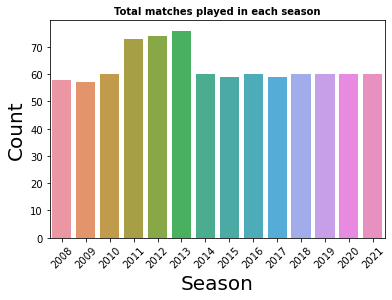

In [23]:
sns.countplot(match_data['Season'])
plt.xticks(rotation=45,  fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Total matches played in each season',fontsize=10,fontweight='bold')

In [24]:
Season_data=match_data[['ID','Season']].merge(ball_data,left_on='ID',right_on='ID',how='left').drop('ID',axis=1)
Season_data

,Season,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,2021,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,2021,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
2,2021,1,0,3,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
3,2021,1,0,4,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,4,0,4,0,0,NaN,NaN,NaN,Chennai Super Kings
4,2021,1,0,5,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208037,2008,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
208038,2008,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
208039,2008,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
208040,2008,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


<function matplotlib.pyplot.show(close=None, block=None)>

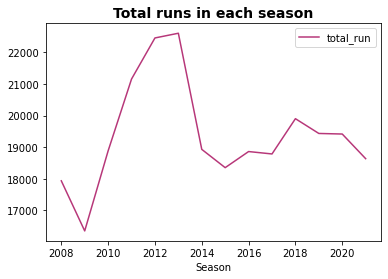

In [25]:
Season=Season_data.groupby(['Season'])['total_run'].sum().reset_index()
p=Season.set_index('Season')
ax =plt.axes()
ax.set(facecolor="white")
sns.lineplot(data=p,palette="magma")
plt.title('Total runs in each season',fontsize=14,fontweight="bold")
plt.show

In [26]:
runs_per_season=pd.concat([match_per_season,Season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per match']=runs_per_season['total_run']/runs_per_season['matches']
runs_per_season.set_index('Season',inplace=True)
runs_per_season

,matches,total_run,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16353,286.894737
2010,60,18883,314.716667
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22602,297.394737
2014,60,18931,315.516667
2015,59,18353,311.067797
2016,60,18862,314.366667


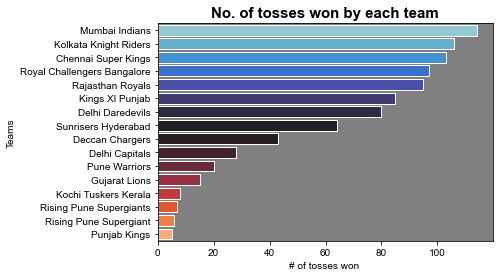

In [27]:
toss=match_data['TossWinner'].value_counts()
ax=plt.axes()
ax.set(facecolor='grey')
sns.set(rc={'figure.figsize':(15,10)},style='darkgrid')
ax.set_title('No. of tosses won by each team',fontsize=15,fontweight='bold')
sns.barplot(y=toss.index,x=toss,orient='h',palette='icefire',saturation=1)
plt.xlabel('# of tosses won ')
plt.ylabel('Teams')
plt.show()

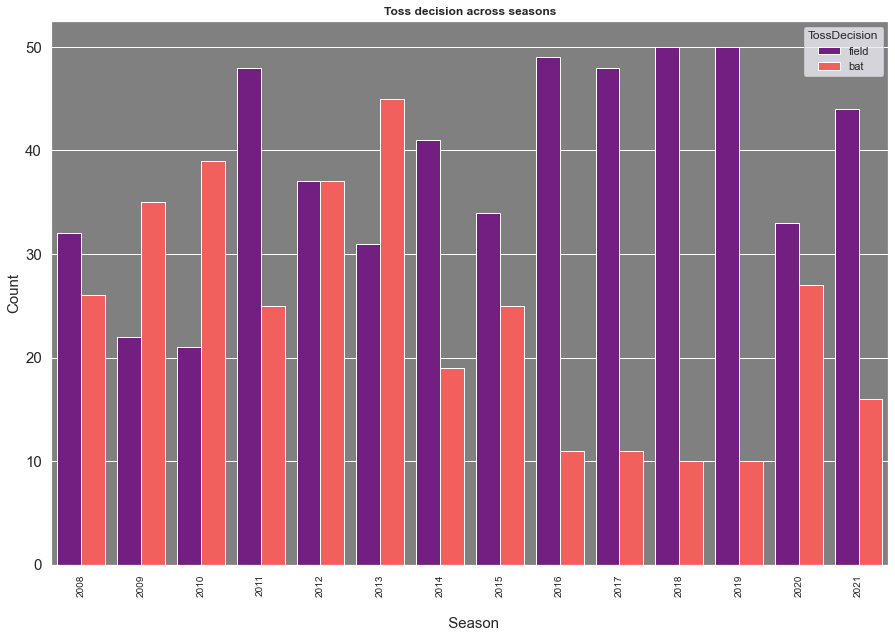

In [28]:
ax=plt.axes()
ax.set(facecolor='grey')
sns.countplot(x='Season',hue='TossDecision',data=match_data,palette='magma',saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n  Season',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Toss decision across seasons',fontsize=12,fontweight='bold')
plt.show()

In [29]:
match_data['WonBy'].value_counts()

Wickets      472
Runs         386
SuperOver     14
NoResults      4
Name: WonBy, dtype: int64

In [30]:
match_data.Venue[match_data.WonBy!='Runs'].mode()

0    Eden Gardens
dtype: object

In [31]:
match_data.Venue[match_data.WonBy!='Wickets'].mode()

0    Wankhede Stadium
dtype: object

In [32]:
match_data.Venue[match_data.TossWinner=='Royal Challengers Bangalore'][match_data.WinningTeam=='Royal Challengers Bangalore'].mode()

0    M Chinnaswamy Stadium
dtype: object

In [33]:
match_data.WinningTeam[match_data.WonBy!='Runs'].mode()

0    Kolkata Knight Riders
dtype: object

In [34]:
match_data.WinningTeam[match_data.WonBy!='Wickets'].mode()

0    Mumbai Indians
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

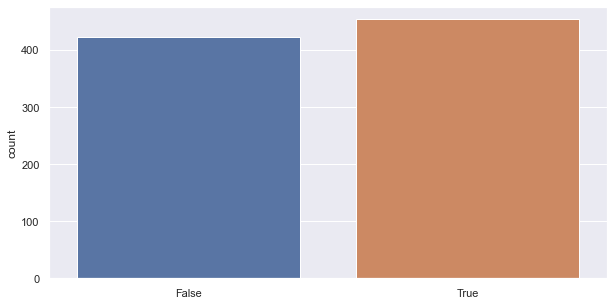

In [35]:
Toss=match_data['TossWinner']==match_data['WinningTeam']
plt.figure(figsize=(10,5))
sns.countplot(Toss)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

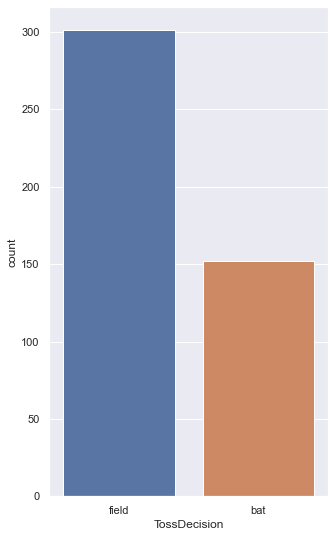

In [36]:
plt.figure(figsize=(5,9))
sns.countplot(match_data.TossDecision[match_data.TossWinner==match_data.WinningTeam])
plt.show

In [37]:
player=(ball_data['batter']=='HH Pandya')
df_HHPandya=ball_data[player]
df_HHPandya.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
1310,1254112,1,12,7,HH Pandya,AR Patel,KA Pollard,NaN,0,0,0,0,0,NaN,NaN,NaN,Mumbai Indians
1313,1254112,1,13,3,HH Pandya,R Ashwin,KA Pollard,NaN,1,0,1,0,0,NaN,NaN,NaN,Mumbai Indians
1315,1254112,1,13,5,HH Pandya,R Ashwin,KA Pollard,NaN,1,0,1,0,0,NaN,NaN,NaN,Mumbai Indians
1318,1254112,1,13,8,HH Pandya,R Ashwin,KA Pollard,NaN,0,0,0,0,0,NaN,NaN,NaN,Mumbai Indians
1325,1254112,1,15,1,HH Pandya,Avesh Khan,KH Pandya,NaN,0,0,0,0,0,NaN,NaN,NaN,Mumbai Indians


<function matplotlib.pyplot.show(close=None, block=None)>

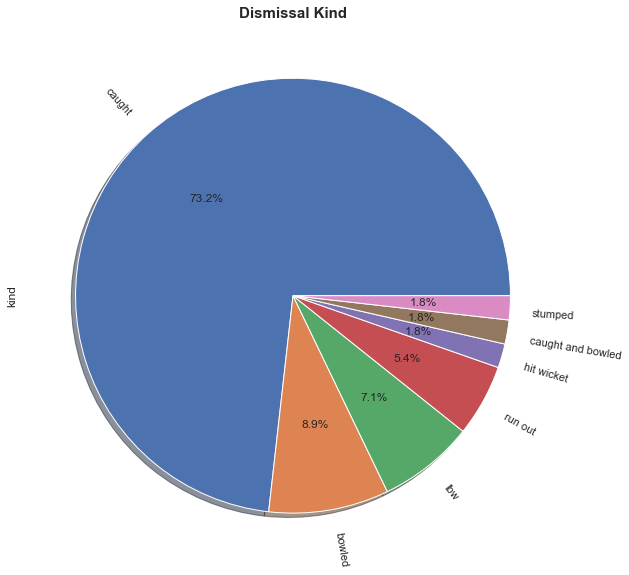

In [38]:
df_HHPandya['kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontweight="bold",fontsize=15)
plt.show

In [39]:
player=(ball_data['batter']=='Shubman Gill')
df_ShubmanGill=ball_data[player]
df_ShubmanGill.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
124,1254117,2,0,1,Shubman Gill,DL Chahar,VR Iyer,wides,0,1,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
125,1254117,2,0,2,Shubman Gill,DL Chahar,VR Iyer,NaN,4,0,4,0,0,NaN,NaN,NaN,Kolkata Knight Riders
126,1254117,2,0,3,Shubman Gill,DL Chahar,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders
127,1254117,2,0,4,Shubman Gill,DL Chahar,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders
128,1254117,2,0,5,Shubman Gill,DL Chahar,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders


<function matplotlib.pyplot.show(close=None, block=None)>

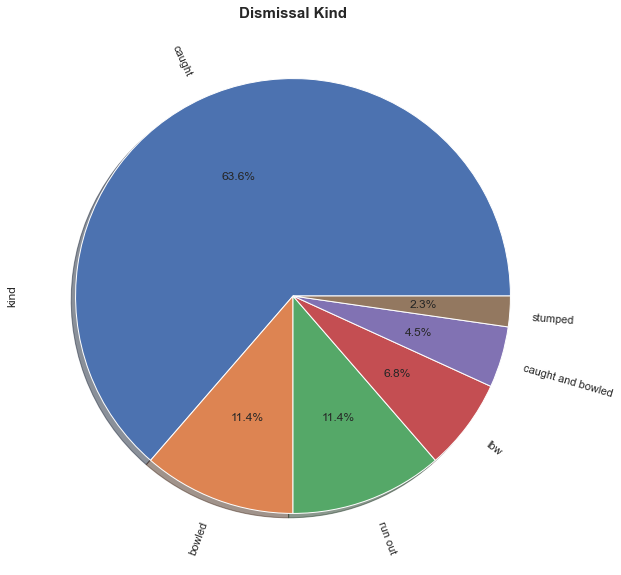

In [40]:
df_ShubmanGill['kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Dismissal Kind",fontweight="bold",fontsize=15)
plt.show

In [41]:
def count(df_ShubmanGill,Runs):
   return len(df_ShubmanGill[df_ShubmanGill['batsman_run']==Runs])*Runs

In [42]:
print("Runs scored from 1's:",count(df_ShubmanGill,1))
print("Runs scored from 2's:",count(df_ShubmanGill,2))
print("Runs scored from 3's:",count(df_ShubmanGill,3))
print("Runs scored from 4's:",count(df_ShubmanGill,4))
print("Runs scored from 6's:",count(df_ShubmanGill,6))

Runs scored from 1's: 491
Runs scored from 2's: 150
Runs scored from 3's: 12
Runs scored from 4's: 548
Runs scored from 6's: 216


In [43]:
match_data[match_data['Margin']==match_data['Margin'].max()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
256,1082635,Delhi,2017-05-06,2017,45,Delhi Daredevils,Mumbai Indians,Feroz Shah Kotla,Delhi Daredevils,field,N,Mumbai Indians,Runs,146.0,NaN,LMP Simmons,"['SV Samson', 'KK Nair', 'SS Iyer', 'RR Pant',...","['LMP Simmons', 'PA Patel', 'KA Pollard', 'RG ...",Nitin Menon,CK Nandan


In [44]:
score=ball_data.groupby(['batter'])['batsman_run'].sum().reset_index()
score.columns=['batter','score']
y=score.sort_values(by='score',ascending=False).head(10).reset_index().drop('index',axis=1)
y

,batter,score
0,V Kohli,6293
1,S Dhawan,5784
2,RG Sharma,5613
3,SK Raina,5536
4,DA Warner,5451
5,AB de Villiers,5181
6,CH Gayle,4997
7,MS Dhoni,4746
8,RV Uthappa,4724
9,G Gambhir,4217


Text(0.5, 1.0, 'Top 10 run scorers in IPL')

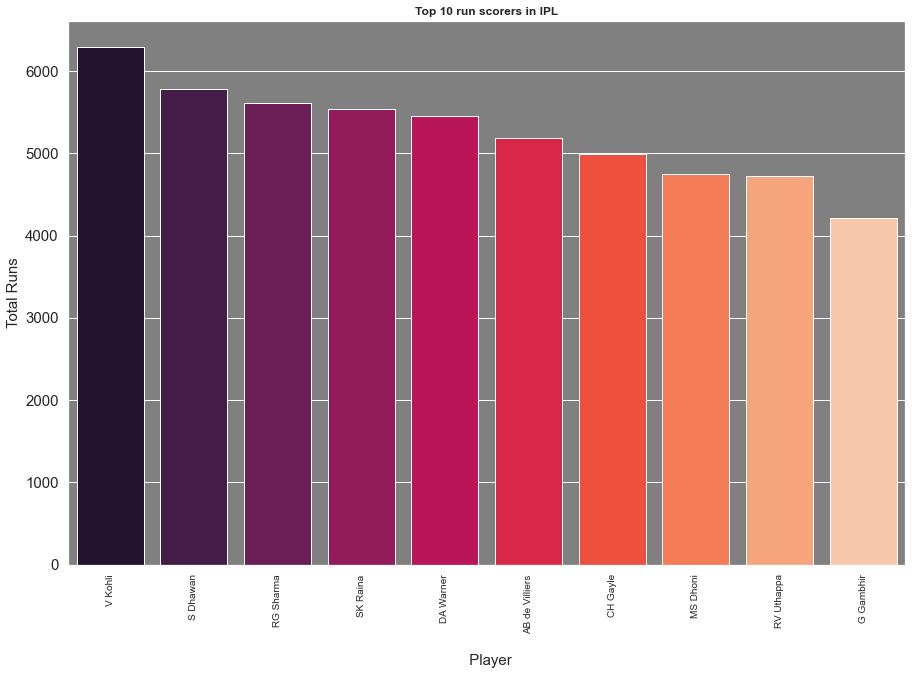

In [45]:
ax=plt.axes()
ax.set(facecolor='grey')
sns.barplot(x=y['batter'],y=y['score'],palette='rocket',saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n  Player',fontsize=15)
plt.ylabel('Total Runs',fontsize=15)
plt.title('Top 10 run scorers in IPL',fontsize=12,fontweight='bold')

Text(0.5, 1.0, 'Highest MOM award  winners')

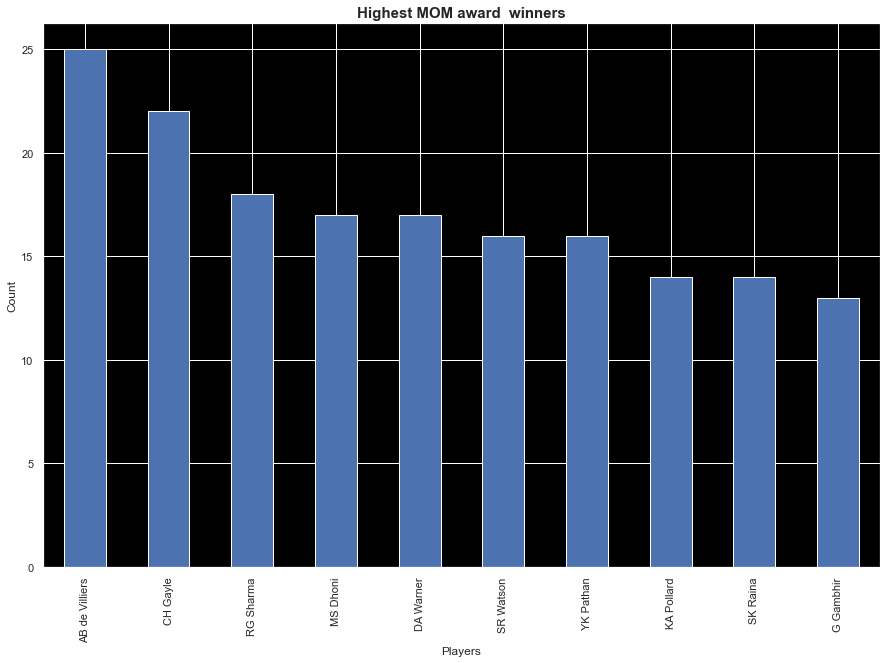

In [46]:
ax=plt.axes()
ax.set(facecolor='black')
match_data.Player_of_Match.value_counts()[:10].plot(kind='bar')
plt.xlabel('Players')
plt.ylabel("Count")
plt.title("Highest MOM award  winners",fontsize=15,fontweight="bold")

In [47]:
wickets=ball_data.groupby(['bowler'])['isWicketDelivery'].sum().reset_index()
wickets.columns=['bowler','wickets']
y=wickets.sort_values(by='wickets',ascending=False).head(10).reset_index().drop('index',axis=1)
y

,bowler,wickets
0,DJ Bravo,190
1,SL Malinga,188
2,A Mishra,175
3,PP Chawla,165
4,Harbhajan Singh,161
5,SP Narine,161
6,R Ashwin,161
7,B Kumar,152
8,JJ Bumrah,145
9,YS Chahal,143


Text(0.5, 1.0, 'Top 10 wickets takers in IPL')

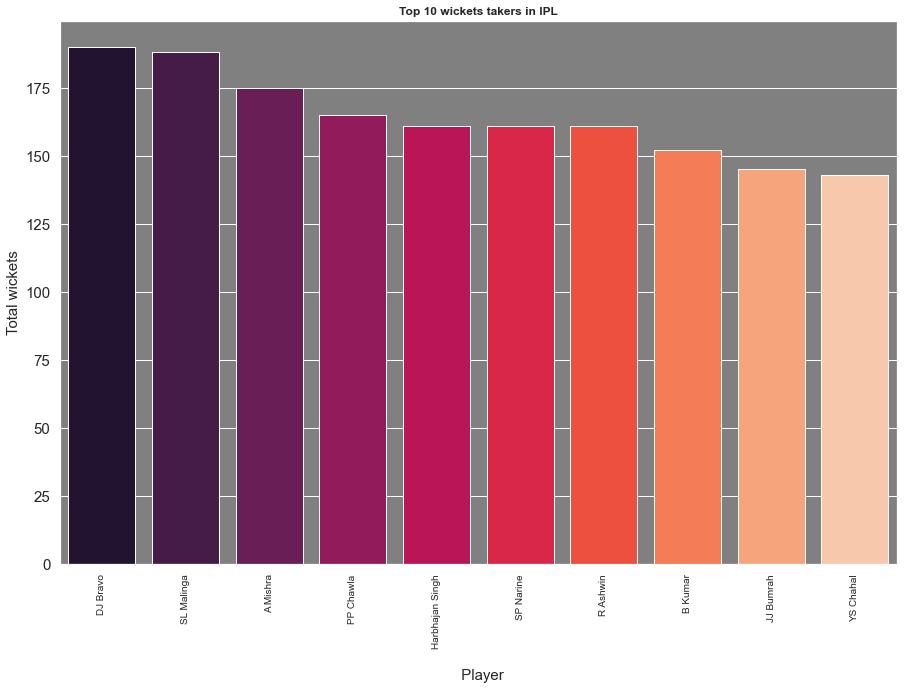

In [48]:
ax=plt.axes()
ax.set(facecolor='grey')
sns.barplot(x=y['bowler'],y=y['wickets'],palette='rocket',saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n  Player',fontsize=15)
plt.ylabel('Total wickets',fontsize=15)
plt.title('Top 10 wickets takers in IPL',fontsize=12,fontweight='bold')